# Introducción a Pandas aplicado al Marketing.

En esta sección aprenderemos las técnicas que se utilizan para comprender el impacto de las campañas de marketing.

¿Cual es el rol de un cientifico de datos en un equipo de marketing?

Probablemente nos pregunten como se realizo una campaña de marketing, las campañas de marketing significan cualquier cosa que requiera el equipo de marketing  para poder trabajar en la promoción de su producto.

Estos podrian ser una nueva dirección creativa, un producto con descuento dirigido a un grupo demografico especiico o una multitud de opciones.

Otra pregunta común es cómo se están desempeñando los diferentes canales de comercialización, por ejemplo cuando enviamos un correo ¿Cuantos usuarios nuevos se suscriben?, tro ejemplo seria dada la tasa de conversión y los ingresos actuales ¿Deberiamos continuar invirtiendo en este canal y cuánto deberiamos gastar?

Otra practica común en marketing es realizar experimentos o pruebas A/B , para tratar de comprender el impacto de un cambio en. particular.Todos estos tipos de preguntas suelen curzarse, ya que podemos analizar una campaña de marketing por canal en funcion de la prueba A/B.


Antes que nada importemos pandas y nuestro dataset:

In [1]:
import pandas as pd

marketing = pd.read_csv("/content/marketing.csv")

## Examinando los datos

Ahora que hemos importado los datos, los examinarmeos para asegurarse de que sean válidos. Si bien puede ser tentador sumergirse en el análisis, al validar tu conjunto de datos de inmediato, te aseguras de que los conocimientos que obtenga sean verdaderos y procesables. Asegurar la validez de tu conjunto de datos siempre debe ser el primer paso que debes dar al comenzar el análisis de un nuevo conjunto de datos.



In [2]:
# primeras 5 columnas
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [3]:
# descripcion estadistica de las columnas de nuestro dataframe

marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [4]:
# Ver si existen valores faltantes y el tipo de dato

marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


Ahora que hemos examinado el DataFrame de marketing, tenemos una comprensión más holística de lo que contiene el conjunto de datos.

## Tipos de datos & fucionado de datos.

En esta parte hablaremos sobre varias técnicas para manipular datos usando Pandas.Cada columna en un DataFrame de pandas tiene un tipo de datos especifico.Algunos de los tipos de datos mas comunes son los Strings, numeros, valores booleanos,fechas.

Podemos consultar el atributo `dtype` si estamos interesados en conocer el tipo de datos de una columna en especifico.

In [5]:
print(marketing['converted'].dtype)

object


Para cambiar el tipo de dato de una columna podemos usar el metodo `.astype`, por ejemplo vemos que el tipo de dato de `converted` es un objeto , sin embargo lo queremos cambiar a un valor booleano, ya que contiene valores verdadero y falso, podemos hacer esto de la siguiente manera:

In [6]:
marketing['converted'] = marketing['converted'].astype('bool')

print(marketing['converted'].dtype)

bool


La columna `marketing_channel` captura el canal en el que un usuario vio un activo de marketing (anuncio), supongamos que deseamos tener una columna donde identifiquemos si un anuncio de marketing en particular era un anuncio interno o no, para esto usaremos `np.where`, especificando en el primer argumento una expresion que verifica si el valor `marketing_chanel` contiene anuncios internos, el segundo argumento es el valor que deseamos asignar si el valor es falso o verdadero:

In [7]:
import numpy as np

marketing['is_house_ads'] = np.where(marketing['marketing_channel'] == 'House Ads',
                                          True,False)

marketing['marketing_channel'].head(3)

0    House Ads
1    House Ads
2    House Ads
Name: marketing_channel, dtype: object

Es importante saber que , debido a que pandas almacena los datos en un gran conjunto de datos, puede ser computacionalmente ineficiente esto, para almacenar columnas de strings, cuando esto suceda podemos almacenar estos valores como numeros.

Para crear una columna de estos códigos de canalización , crearemos un diccionario que asigne los canales a códigos numéricos

In [8]:
channel_dict = {'House_Ads':1,'Instagram':2,
                'Facebook':3,'Email':4,'Push':5}

Luego usaremos el método `map` en la columna que crearemos llamada `channel_code`, como se muestra a continuación:

In [9]:
marketing['channel_code'] = marketing['marketing_channel'].map(channel_dict)
n = 4
marketing['channel_code'].sample(n)

8914    NaN
9052    5.0
8909    5.0
9545    3.0
Name: channel_code, dtype: float64

A menudo , tendremos columnas de fecha que pandas lee incorrectamente como un objeto, sin embargo tener una columna de tipo de dato fecha tiene varias ventajas & tenemos 2 opciones para asegurarnos de que ciertas columnas se traten como fechas:

* Primero  , al importar el conjunto de datos , podemos pasar una lista de columnas al argumento `parse_dates` para garantizar que estas columnas se interpreten como collumnas de fecha:

In [10]:
marketing_2 = pd.read_csv("/content/marketing.csv",
                          parse_dates=['date_served',
                                      'date_subscribed',
                                      'date_canceled'])

Otra opción es usar la función `datetime()` de pandas para convertir una columna especifica:

In [11]:
marketing['date_served'] = pd.to_datetime(marketing['date_served'])

Una vez especificadas las fehcas en la columna correcta, podemos usar varios atributos de fecha para extraer información relevante, por ejemplo para obtener el dia de semana usaremos el método `dayofweek`.

In [12]:
marketing['day_served'] = marketing['date_served'].dt.dayofweek

## Mas ejemplos:

## Actualizando el tipo de datos de una columna.

A menudo, querrás modificar el tipo de datos de las columnas para adaptarlo a tus necesidades.Pandas y Python tienen funcionalidades especiales en torno a la manipulación de tipos de datos que pueden hacer que tu análisis sea más fácil y más sólido, como concatenar cadenas y sumar valores booleanos.Sin embargo, esta funcionalidad solo es posible si las columnas se almacenan como el tipo de datos deseado.

A continuación modificaremos el tipo de datos de la columna `is_retained`

In [13]:
print(marketing['is_retained'].dtype)

object


In [14]:
# Convertir is_retained  a booleano
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Verificar el nuievo tipo de datos
print(marketing['is_retained'].dtype)

bool


Al cambiar el tipo de datos a booleano, ahora puedes sumar la columna is_retained para calcular el número de usuarios retenidos.

Agreguemos una nueva columna, is_correct_lang, que es "Sí" si al usuario se le mostró el anuncio en su idioma preferido, "No" en caso contrario.

In [15]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

# Columnas de fecha


Actualmente, las columnas de fecha en el DataFrame de marketing se leen incorrectamente como objetos. Necesitamos convertir estas columnas en columnas de fecha para poder utilizar las sólidas capacidades de manipulación y formato de fechas de Python y pandas.

En este ejercicio, practicaremos la lectura del CSV con las columnas de fecha adecuadas y creará una columna de día de la semana.

In [16]:
# Importamos los datos con las columnas especiales
marketing = pd.read_csv('marketing.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Creamos una nueva columna que contenga el diad e la semana
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0


## Análisis exploratorio.

Ahora que iportamos nuestro dataframe y estamos familiarizado con el , es hora de hacer un analisis exploratorio inicial.

Para comenzar , tengamos idea de cuantos usuarios ven nuestros anuncios diario, para esto usaremos el método `grpupby()`, pasando como argumento inicial la fecha , a continuacion seleccionamos `user_id`junto con `unique` para contar la cantidad de usuarios unicos cada dia.

In [17]:
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

print(daily_users.head(10))

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
Name: user_id, dtype: int64


Podemos ver que alrrededor de unos 300 usuarios ven nuestros anuncios cada dia, como vimos anteriormente no es facil interpretar los resultados cuando se ven en un dataframe , por lo que es necesario graficarlos:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


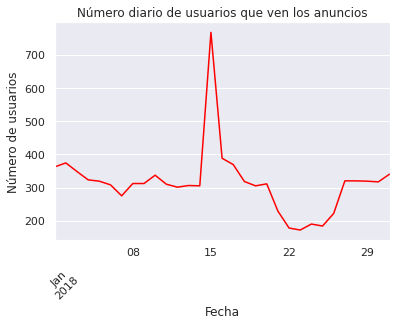

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Grafico
sns.set()
daily_users.plot(color='red')

_ = plt.title("Número diario de usuarios que ven los anuncios")
_ = plt.xlabel('Fecha')
_ = plt.ylabel('Número de usuarios')
_ = plt.xticks(rotation=45)

plt.show()

Al igual que en los usuarios diarios que ven los activos de marketing, hay un gran pico en el momento en que se produce una explosión de correo electrónico. Exploraremos esto más a fondo en lecciones futuras.

## Introducción a las metricas mas comunes del marketing.

Aquí analizaremos terminos y metricas de marketing comunes y cómo se miden estas metricas, como profesional a menudo nos encontraremos traduciendo **preguntas de negocios en resultados medibles**.

Una de las preguntas mas comunes es ¿Tuvo éxito la campaña?.Al principio esta pregimta podria parecer un poco intimidante, pero hay tantas maneras en las cuales podemos medir el éxito de nuestra campaña. Dicho esto , existen algunos tipos de métricas que usaremos una vez y otra vez.

Para un equipo de marketing, el éxito de la camapaña generalmente se mide por la tasa de conversión.

La **tasa de conversión** significa , de todas las personas que entraron en contacto con nuestra campaña de marketing ¿cuántos compraron el producto?

Dependiendo de la empresa, esto podria significar que una persona hizo una compra o realizo una suscripcion a un sericio.Ademas , muchas empresas de suscripción se preocupan por la retención.

Una vez que el usuario se ha suscrito a nuestro servicio nos preguntamos ¿ Seguira siendo suscriptor dentro de 1 , 2 o 3 meses?

Esta metrica puede ser particularmente dificl de medir por que requiere mucha paciencia, no podemos saber las tasas de retención de 90 días hasta que hayan pasado 90 dias desde que un usuario se suscribio inicialmente.

La tasa de conversión es el porcentaje de las personas a las que comercializamos que finalmente usan nuestro producto, para nuestros fines nos concentraremos en un servicio de suscripción y hablaremos sobre la conversión en términos de suscripciones.

Para calcular el número total de personas que adquirieron nuestro producto, dividimos el dataframe para incluir las filas solo donde `converted` es igual a verdadero y luego contamos los unicos usuarios:

In [19]:
suscriptores = marketing[marketing['converted'] == True]['user_id'].nunique()

Ahora calculamos el número total de personas que vieron nuestro anuncio.

In [20]:
total = marketing['user_id'].nunique()

Ahora que tenemos el numero de suscriptores y el total de usuarios , pasemos a calcular la tasa de conversion dividiendo los suscriptores por el total de usuarios:

In [21]:
conv_rate = suscriptores/total

print(round(conv_rate*100,2), '%')

13.89 %


Quizás te estés preguntando, ¿es esta una buena tasa de conversión? Esto dependerá en gran medida de su negocio. No existe un número en particular al que todos los equipos de marketing estén tratando de alcanzar. En cambio, cuando trabajas en un equipo de marketing, es útil mirar los datos históricos para determinar si una tasa de conversión es la que esperas.

Recordemos que la tasa de retención es el porcentaje de personas que permanecen suscritas despues de un cierto periodo de tiempo, aqui nos centraremos en la retención de 1 mes, para determinar la tasa de retención  , primero calculamos el total de usuarios que sigen siendo suscriptores despues de un mes.

In [22]:
user_reatined = marketing[marketing['is_retained'] == True]['user_id'].nunique()


Podemos reutilizar nuestro calculo de suscriptores apartir de la tasa de conversión, ya que el número total de usuarios que se suscribieron sigue siendo el mismo.

In [23]:
retencion = user_reatined/suscriptores
print(round(retencion*100,2), '%')

66.8 %


Al igual que con la tasa de conversión, no existe una tasa de retención que se aplique a todas las empresas e industrias. Observe las tasas de retención históricas o las tasas de retención de empresas de una industria similar para interpretar sus resultados.


## Segmentación del cliente.

Ademas de las metricas de alto nivel, es importante segmentar a los clientes segun a que clientes aplicaremos marketing.

Segmentar significa desglosar las métricas por caracteristicas especificas, por ejemplo , ademas de mirar las tasas de conversión general, es posible que también deseemos ver la tasa de conversión por grupos de edad, ya que es posible que una camapaña tenga una tasa de conversión baja para cierto rango de edad pero , super efectivo para usarios que tenian 55 años o mas.

Podemos usar los restultados para realizar una campaña donde los usuarios quee tengan 55 años o mas reciban una técnnica diferente a os demas usuarios.

Una forma de segmentación seria verificando la tasa de retención de los usarios que contrataron nuestro servicio haciendo clic en un anuncio.

In [24]:
house_ads = marketing[marketing['subscribing_channel'] == 'House Ads']
retained = house_ads[house_ads['is_retained'] == True]['user_id'].nunique()
suscribers = house_ads[house_ads['converted']== True]['user_id'].nunique()

retention_rate = retained/suscribers

print(round(retention_rate*100,2), '%')

58.05 %


¿Cómo podemos saber si esta tasa de retención es buena o mala?

Idealmente , comparamos la retención y clasiifcamos en todos los canales para determinar si algunos canales funcionan mejor que otros.

El método anterior es excelente si solo nos interesan algunos de los subsegmentos que se encuentran en nuestro dataframe.Sin embargo, volver a calcular la tasa de rención si deseamos comparar todos los canales puede ser fastidioso.

Aquí es cuando entra la flexibilidad de pandas, podemos usar el método `groupby` para analizar y clacular estadisticas para múltiples subsegmentos en nuestros datos.

## Comparación de la tasa de conversión de idiomas.

El equipo de marketing quiere determinar qué tan efectiva fue la campaña para convertir a hablantes de español.
Aislaremos los datos de los hablantes de español y calcularemos la tasa de conversión como en los ejercicios anteriores. 

Una vez que tengamos la tasa de conversión para hablantes de español, podemos compararla con la tasa de conversión general para tener una idea de cuán efectiva fue la campaña de marketing entre este grupo en comparación con la población general.


In [25]:
# Aislamos a los usuarios que hablan español
spanish_speakers = marketing[marketing['language_displayed'] == 'Spanish']
# Calculamos el total de usuarios que hablan español
total = spanish_speakers['user_id'].nunique()

# Calculamos el número de hablantes de español que contrataron el servicio
subscribers = spanish_speakers[spanish_speakers['converted'] == True]\
                            ['user_id'].nunique()

# Calculamos la tasa de conversión
conversion_rate = subscribers/total
print('Hablantes de español, tasa de conversión:',  round(conversion_rate*100,2), '%')

Hablantes de español, tasa de conversión: 20.0 %


A continuación, compararemos el español con el resto de los idiomas del conjunto de datos. Cuando hacemos esta comparación entre idiomas, podemos tener una idea de qué idiomas se convierten bien en relación con otros.

A continuación, deseamos ver la tasa de conversión por el idioma en el que se mostró el activo de marketing. Si bien muchos de los usuarios hablan inglés, algunos prefieren otro idioma. Revisemos para asegurarnos de que el material de marketing esté bien traducido en todos los idiomas.

Puedes analizar métricas por datos demográficos específicos utilizando .groupby (). En lugar de observar la tasa de conversión general en el conjunto de datos, agrupa por preferencia de idioma, lo que le permite determinar si la campaña de marketing fue más efectiva en ciertos idiomas.

In [26]:
# Agrupar por idioma y por usuarios unicos
total = marketing.groupby(['language_displayed'])\
                                  ['user_id'].nunique()

# Agrupe por language_displayed y cuente las conversiones únicas
subscribers = marketing[marketing['converted'] == True]\
                       .groupby(['language_displayed'])\
                       ['user_id'].nunique()

# Calcular la tasa de conversión de todos los idiomas.
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


Notemos que la tasa de conversión es mucho más baja para inglés y español. Llevaremos a cabo una investigación más profunda sobre las diferencias entre la tasa de conversión por idioma.


## Agregando por Fecha.

El equipo de marketing desea saber si hay alguna diferencia en la tasa de conversión según el momento del mes en que los usuarios vieron un anuncio. 



In [27]:
# Agrupar por date_served y contar usuarios únicos
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Agrupar por fecha de servicio y contar usuarios únicos con el servicio
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calcule la tasa de conversión por día
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


# Graficando los resultados de la campaña.

Es hora de aprender la mejor manera de visualizar nuestros resultados , para poder aumentar la facilidad de interpretación, especialmente para las personas que no se sientan comodas con los datos sin graficar.



[]

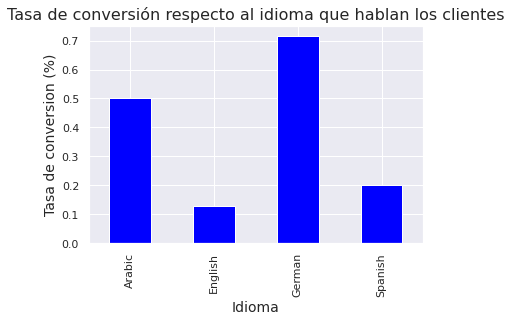

In [28]:
_ = language_conversion_rate.plot(kind='bar',color='blue')
_ = plt.xlabel('Idioma',size=14)
_ = plt.ylabel('Tasa de conversion (%)',size = 14)
_ = plt.title('Tasa de conversión respecto al idioma que hablan los clientes', size=16)

plt.plot()

# Creación de DataFrame de tasa de conversión diaria


Para comprender las tendencias a lo largo del tiempo, crearemos un nuevo DataFrame que incluya la tasa de conversión cada día. Seguiremos esencialmente los mismos pasos que antes cuando calculamos la tasa de conversión general, esta vez también agrupando por la fecha en que un usuario se suscribió.

Mirar la tasa de conversión diaria es crucial para contextualizar si la tasa de conversión en un día en particular fue buena o mala. Además, observar la tasa de conversión a lo largo del tiempo puede ayudar a mostrar tendencias, como una tasa de conversión que parece estar disminuyendo con el tiempo. Este tipo de tendencias es crucial para identificar a las partes interesadas del marketing lo antes posible.

In [29]:
# Agrupar por date_served y contar usuarios únicos
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Agrupar por fecha de servicio y calcular suscriptores
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calcular la tasa de conversión para todos los idiomas
daily_conversion_rate = subscribers/total

# Configurar nuestros datos para visualizar la conversión diaria.

Cuando deseemos comprender el rendimiento de la campaña, es esencial observar cómo cambiaron las métricas clave a lo largo de la campaña. Sus métricas clave pueden ayudarlo a detectar problemas que puedan haber ocurrido durante la campaña, como un error en el sistema de pago que provocó una caída en la conversión hacia el final de su campaña. Las métricas a lo largo del tiempo también pueden mostrar tendencias, como ganar más suscriptores durante los fines de semana o en días festivos específicos.

En este ejercicio, se basará en la tasa de conversión diaria de DataFrame daily_conversion_rate que creó en un ejercicio anterior. Antes de que pueda comenzar a visualizar, debe transformar sus datos en un formato más fácil de usar con pandas y matplotlib.

In [30]:
# Restablecer índice para convertir los resultados en un DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Renombrar las columnas
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

# Visualizando la tasa de conversión diaria.


Ahora que ha formateado los datos en un formato más manejable para la visualización, procederá a crear un gráfico de líneas. Las habilidades de visualización sólidas son cruciales para un científico de datos porque le permitirá a usted y a sus partes interesadas de marketing obtener conocimientos más profundos de los datos. En este caso, crear un gráfico de líneas hará que sea mucho más fácil notar picos y valles en nuestra tasa de conversión a lo largo del tiempo, así como cualquier tendencia general.

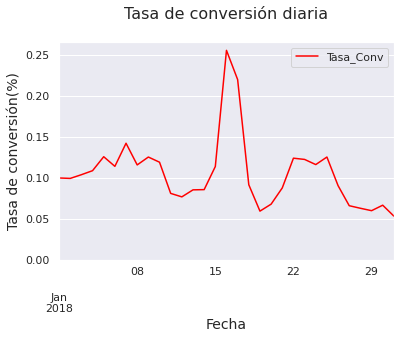

In [31]:
# Cree un gráfico de líneas usando daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served', 'conversion_rate',color='red',legend=True)

_ = plt.title('Tasa de conversión diaria\n', size = 16)
_ = plt.ylabel('Tasa de conversión(%)', size = 14)
_ = plt.xlabel('Fecha', size = 14)
_ = plt.legend(['Tasa_Conv'])
# Establecer el eje y para que comience en 0
plt.ylim(0)

# Mostrar el grafico
plt.show()

# Canales de marketing en todos los grupos de edad


Algunas partes interesadas en el marketing quieren saber si sus canales de marketing están llegando a todos los usuarios por igual o si algunos canales de marketing están sirviendo a grupos demográficos de edad específicos.

Dentro de un equipo de marketing, es común recibir solicitudes que requieren análisis y visualización rápidos. Cuanto mejor visualice los resultados, es más probable que comunique eficazmente sus hallazgos a las partes interesadas.

En este ejercicio, creará un gráfico de barras agrupadas que muestre a cuántas personas llegó cada canal de marketing por grupo de edad.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'superior derecha'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


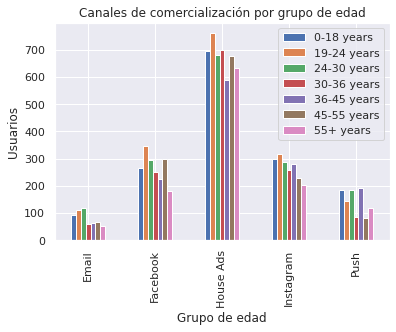

In [32]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Desapilar channel_age y transfórmalo en un DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# graficar los resultados
channel_age_df.plot(kind = 'bar')
_ = plt.title('Canales de comercialización por grupo de edad')
_ = plt.xlabel('Grupo de edad')
_ = plt.ylabel('Usuarios')
# Agregamos una leyenda
_ = plt.legend(loc = 'superior derecha', 
           labels = channel_age_df.columns.values)
plt.show()

Como puedes ver, el correo electrónico no llega a los grupos de mayor edad y Facebook no llega a muchas personas menores de 18 años.

## Agrupar y contar por varias columnas

Las partes interesadas han comenzado a competir para ver qué canal tenía la mejor tasa de retención de la campaña. Primero debe determinar cuántos suscriptores provienen de la campaña y cuántos de esos suscriptores han permanecido en el servicio.

Es importante identificar cómo se está desempeñando cada canal de marketing porque esto afectará la estrategia de la empresa en el futuro. Si un canal está superando a otros, podría indicar que el canal merece una mayor inversión.

* Utilice `.groupby()` para calcular suscriptores por subscripción_canal y fecha_suscripción.

In [33]:
# Cuente las suscripciones por canal de suscripción y fecha de suscripción
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                       ['user_id'].nunique()

print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


* Utilicemos `.groupby()` para calcular los suscriptores retenidos por subscribing_channel y date_subscriptions.

In [34]:
# Cuente las suscripciones retenidas por canal de suscripción y fecha de suscripción
retention_subs = marketing[marketing['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()


print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


# Analizar las tasas de retención de la campaña.

Ahora que ha calculado el total de suscriptores y los suscriptores retenidos, puede resolver la cuestión de qué canal tuvo la tasa de retención más alta.

En este ejercicio, calculará la tasa de retención para cada canal de suscripción y visualizará sus resultados.

* Divida retención_suscripciones por retención_total para obtener la tasa de retención suscribiendo el canal por fecha de suscripción.


* Agregue el título 'Tasa de retención por canal de suscripción'.

* Nombra la etiqueta del eje x y la etiqueta del eje y 'Fecha de suscripción' y 'Tasa de retención (%)' respectivamente.

* Coloque la leyenda en la esquina superior derecha y muestre el gráfico.

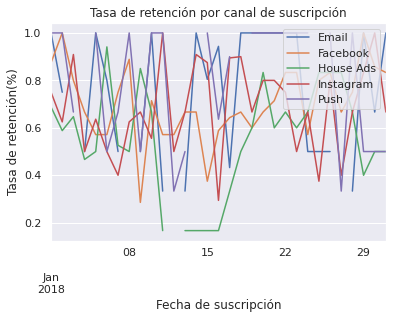

In [35]:
# Dividir suscriptores retenidos por suscriptores totales
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# graficar
retention_rate_df.plot()

# Agregue un título, etiqueta x, etiqueta y, leyenda y muestre el gráfico
plt.title('Tasa de retención por canal de suscripción')
plt.xlabel('Fecha de suscripción')
plt.ylabel('Tasa de retención(%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

# Automatización de funciónes para el análisis.

Anteriormente notamos que estabamos haciendo muchas tareas repetitivas y bastante simialres, cada vez que observemos una repetición en nuestro trabajo, debemos pensar como podemos automatizarlo.

Una de las mejores formas de acelerar este tipo de análisis es crear funciones, para esto definiremos una función llamada ´tention_rate´ que permite a los usuarios ingresar un dataframe y una lista de nombres de columna y su funcionamiento sigue los mismos pasos, calcular el numero total de usuarios que contrataron el servicio y se quedaron.

Primero calculamos el número de suscriptores y finalmente los dividomos paraobtener la retención.

In [36]:
def retention_rate_f(dataframe,column_name):
    """
     permite a los usuarios ingresar un dataframe y una lista de nombres de columna
     y su funcionamiento sigue los mismos pasos
     , calcular el numero total de usuarios que contrataron el servicio y se quedaron.


     ARG: dataframe,column_name

     Output: tasa de convesrion.
    """
    retencion = dataframe[dataframe['is_retained'] == True]\
    .groupby(column_name)['user_id'].nunique()

    conversion = dataframe[dataframe['converted'] == True]\
    .groupby(column_name)['user_id'].nunique()

    retencion_rate = retencion/conversion

    return retencion_rate

Ahora usaremos nuestra funcion:

In [37]:
daily_retention = retention_rate_f(marketing,
                                   ['date_subscribed','subscribing_channel'])
daily_retention = pd.DataFrame(daily_retention.unstack(level=1))

print(daily_retention.head())

subscribing_channel  Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                     
2018-01-01            1.00  0.875000   0.687500   0.750000  1.000000
2018-01-02            0.75  1.000000   0.588235   0.625000  1.000000
2018-01-03             NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04            1.00  0.666667   0.466667   0.500000       NaN
2018-01-05            1.00  0.571429   0.500000   0.636364  1.000000


A continuación, seguimos los mismos pasos que antes para trazar nuestros resultados:

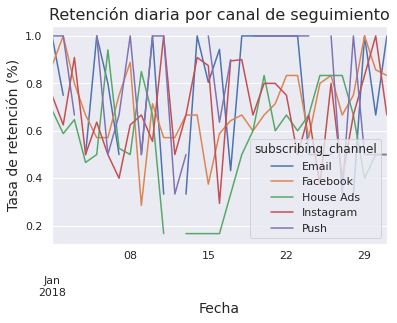

In [38]:
sns.set()

retention_rate_df.plot()

_ = plt.title('Retención diaria por canal de seguimiento', size=16)
_ = plt.xlabel('Fecha',size=14)
_ = plt.ylabel('Tasa de retención (%)',size = 14)

plt.show()

Nuevamente, en lugar de escribir código una y otra vez para graficar , crearemos una función que lo haga por nosotros., para esto creamos un bucle for donde pra cada columna en el dataframe, grafique los datos que nos interesan.

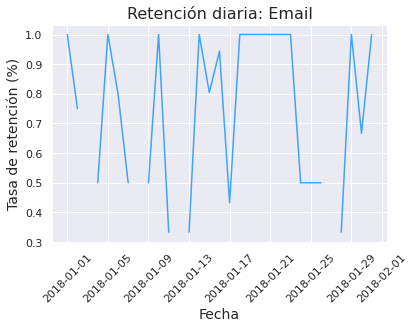

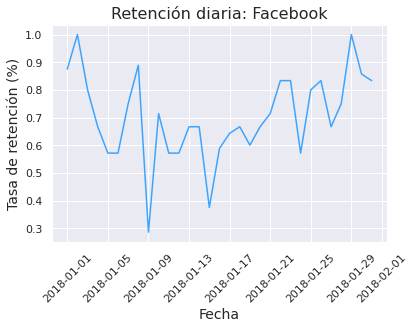

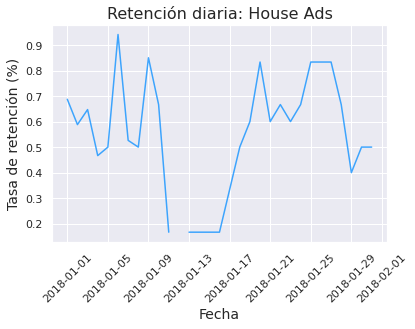

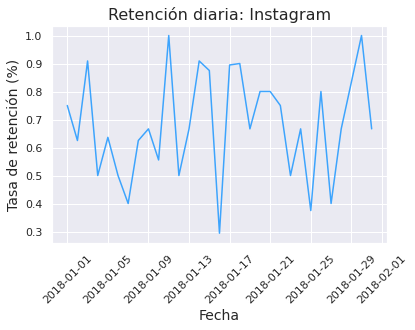

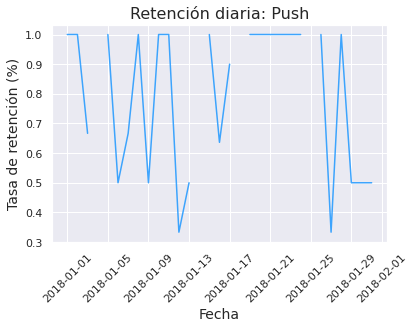

In [39]:
def plotting(dataframe):
  for column in dataframe:
    plt.plot(dataframe.index,dataframe[column],color='#29fD')
    plt.title('Retención diaria: ' + column,size=16)
    plt.ylabel('Tasa de retención (%)', size=14)
    plt.xlabel('Fecha',size=14)
    plt.xticks(rotation=45)
    plt.show()

plotting(retention_rate_df)

### Construyendo una función de conversión.

Has estado haciendo muchos cálculos repetitivos. Siempre que notes repetición en tu trabajo, considera la automatización. Cuanto más trabajo  puedas automatizar, más tiempo tendrás para explorar nuevos e interesantes temas de ciencia de datos en el trabajo. ¡Esto impresionará a las partes interesadas de marketing y será más divertido!

Dado que sabes que el formato del DataFrame de marketing seguirá siendo el mismo con el tiempo, puedes crear una función que te permita calcular la tasa de conversión en cualquier subsegmento que desee sobre la marcha.



In [40]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

### Prueba y visualiza la función de conversión.


Has realizado el arduo trabajo de desarrollar tu función de tasa de conversión, ¡ahora es el momento de probarla! Automatizar tus análisis puede llevar mucho tiempo desde el principio, pero aquí es donde todo vale la pena.

En este ejercicio, verás qué tan rápido puedes calcular la tasa de conversión. Una tarea que en lecciones anteriores tomó múltiples pasos. Al automatizar las partes repetitivas de su trabajo, podrá dedicar más tiempo a realizar análisis complejos.

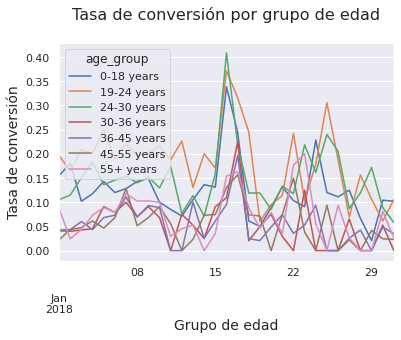

In [41]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing,['date_served','age_group'])

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Tasa de conversión por grupo de edad\n', size = 16)
plt.ylabel('Tasa de conversión', size = 14)
plt.xlabel('Grupo de edad', size = 14)
plt.show()

### Función de trazado

Ahora que has analizado la tasa de conversión por edad, quieres ver si esa tendencia ha cambiado con el tiempo. El marketing ha estado cambiando su estrategia y quiere asegurarse de que su nuevo método no aliene a los grupos de edad que se sienten menos cómodos con su producto. Sin embargo, para hacerlo, debes crear una función de trazado para facilitar la visualización de sus resultados.

En este ejercicio, creará una función para trazar los resultados de su función de tasa de conversión.

In [42]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        # Show plot
        plt.show()
        plt.clf()

Poniendolo todo junto
Tus Empleados  en marketing han solicitado un informe de la tasa de conversión diaria para cada grupo de edad y lo necesitan lo antes posible. Quieren que actualices este informe con una cadencia mensual. Esta es una oportunidad perfecta para utilizar sus funciones. Las funciones no solo lo ayudarán a publicar este informe rápidamente hoy, sino que también lo ayudarán cada mes cuando sea el momento de actualizar los datos.

Recuerde, conversion_rate () toma un DataFrame y una lista de columnas para calcular la tasa de conversión.

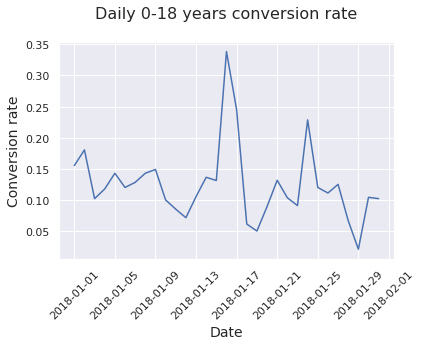

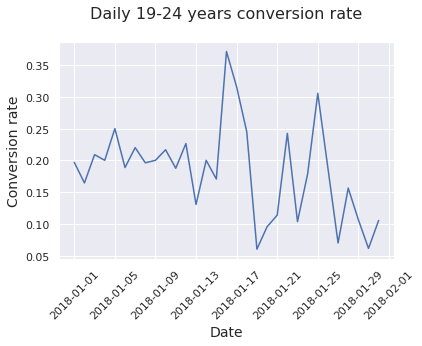

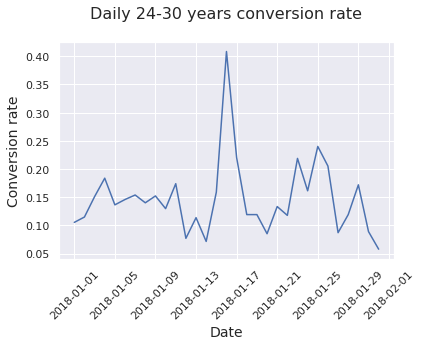

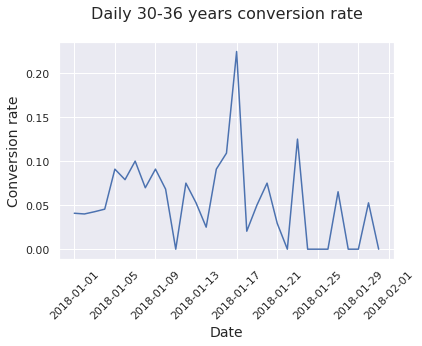

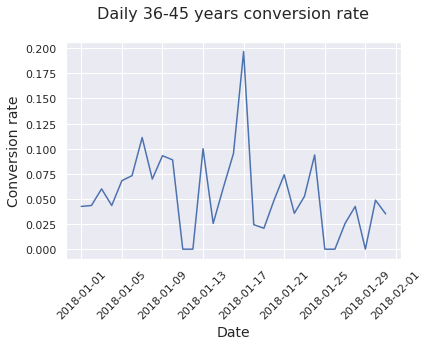

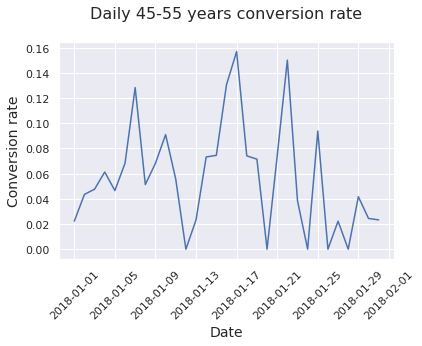

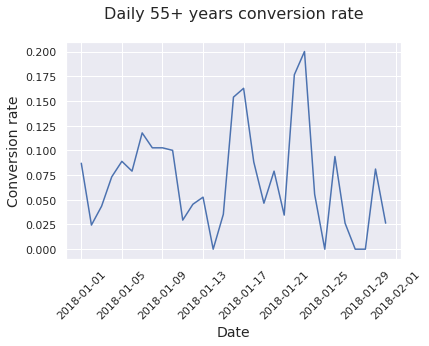

<Figure size 432x288 with 0 Axes>

In [43]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, 
                                 ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

### Tasa de conversión de anuncios internos

El equipo de anuncios internos se ha preocupado por algunas irregularidades que han notado en la tasa de conversión. Es común que las partes interesadas acudan a usted con inquietudes que hayan notado acerca de los cambios en las métricas. Como científico de datos, es su trabajo determinar si estos cambios son fluctuaciones naturales o si requieren más investigación.

* Utilice su función conversion_rate () en marketing para determinar la tasa de conversión por 'date_served' y 'marketing_channel'.

In [44]:
# Calcule la tasa de conversión por fecha de publicación y canal
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


### Análisis de la tasa de conversión de anuncios internos.

Ahora que ha confirmado que la conversión de anuncios internos ha disminuido desde el 11 de enero, intentará identificar las posibles causas de la disminución.

Como científico de datos que apoya a un equipo de marketing, se encontrará con métricas fluctuantes todo el tiempo. Es vital identificar si las fluctuaciones se deben a cambios esperados en el comportamiento del usuario (es decir, diferencias a lo largo del día de la semana) versus un problema mayor en la implementación técnica o la estrategia de marketing.

En este ejercicio, comenzaremos por verificar si es más probable que los usuarios realicen conversiones los fines de semana en comparación con los días de la semana y determinaremos si esa podría ser la causa del cambio en la tasa de conversión de los anuncios internos.

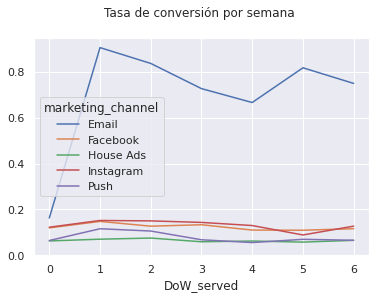

In [45]:
# Agregar la columna del día de la semana a marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calcule la tasa de conversión por día de la semana
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Desapilar canales
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))
# Trace la tasa de conversión por día de la semana
DoW_df.plot()
plt.title('Tasa de conversión por semana \n')
plt.ylim(0)
plt.show()

Como puedes ver, el correo electrónico es particularmente alto y puede reflejar un error de seguimiento, pero los anuncios internos parecen estables a lo largo de la semana con un ligero pico el martes.

### Conversión de anuncios internos por idioma.

Ahora que ha descartado las fluctuaciones naturales a lo largo del día de la semana en que un usuario vio nuestros activos de marketing, ya que provocan una disminución en la conversión de anuncios internos, analizará la conversión por idioma a lo largo del tiempo. Quizás la nueva campaña de marketing no se aplique de manera amplia en diferentes culturas.

Idealmente, el equipo de marketing considerará las diferencias culturales antes de lanzar una campaña, pero a veces se cometen errores y será su trabajo identificar la causa. A menudo, los científicos de datos son la primera línea de defensa para determinar qué salió mal con una campaña de marketing. Es su trabajo pensar de manera creativa para identificar la causa.

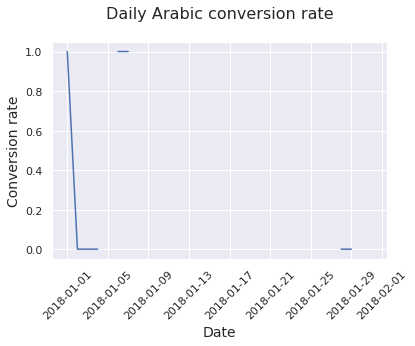

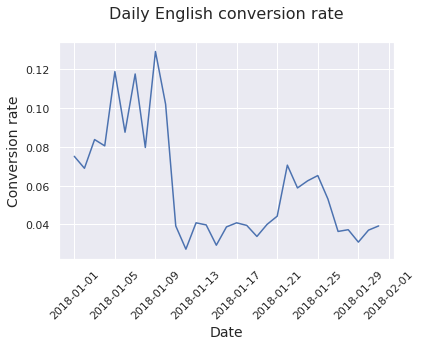

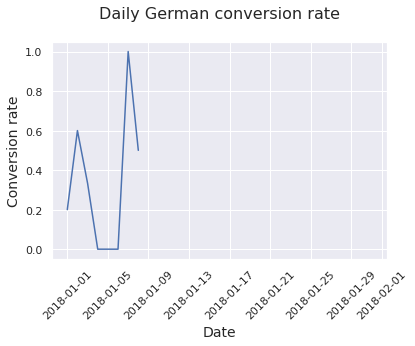

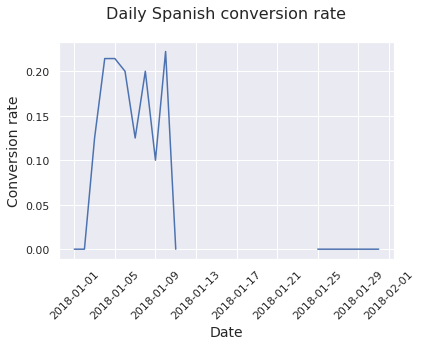

<Figure size 432x288 with 0 Axes>

In [46]:
# Aislar las filas en las que el canal de marketing son anuncios internos
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calcular la conversión por fecha de publicación e idioma mostrado
conv_lang_channel = conversion_rate(house_ads, 
                                    ['date_served', 
                                     'language_displayed'])

# Desapilar conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Utilice la función de trazado para mostrar resultados
plotting_conv(conv_lang_df)

Como puedes ver, la tasa de conversión en inglés cae alrededor del día 11, y no parece que se publiquen anuncios en otros idiomas durante un período de dos semanas. 


### Creación de un DataFrame para anuncios internos.

El equipo de anuncios internos está preocupado porque su tasa de conversión ha disminuido repentinamente en las últimas semanas. En los ejercicios anteriores, confirmó que la conversión ha disminuido porque notó un patrón en las preferencias de idioma.

Como científico de datos, es su trabajo proporcionar a las partes interesadas del marketing la información más específica posible sobre lo que salió mal para maximizar su capacidad para corregir el problema. Es vital que no solo diga "parece que hay un problema de idioma", sino que identifique cuál es el problema específicamente para que el equipo no repita su error.

In [47]:
# Agrega la nueva columna is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'], 
    'Yes', 
    'No')

# Agrupar por date_served e is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Desapilar language_check y completar los valores faltantes con ceros
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Imprimir lso resultados
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Confirmando el error de los anuncios internos
Ahora que has creado un DataFrame que verifica si los usuarios ven anuncios en el idioma correcto, calculemos qué porcentaje de usuarios no recibieron anuncios en el idioma correcto y tracemos los resultados.

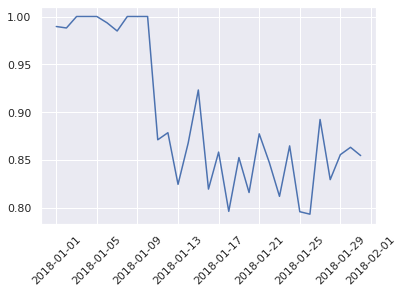

In [48]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 45)
plt.show()

Has demostrado que los anuncios de autopromoción han tenido un rendimiento inferior debido a que publican todos los anuncios en inglés en lugar del idioma preferido de cada usuario.

###  A/B pruebas para Marketing.


En esta sección veremos cómo se utilizan las pruebas A/B dentro de los departamentos de marketing.Pero ¿Qué es una prueba A/B? Bueno pues es un experimento aleatorio que evalúa qué variante fucniona mejor, o en otras palabras:


El A/B Test consiste en desarrollar y lanzar dos versiones de un mismo elemento y medir cuál funciona mejor. Es una prueba que nos sirve para optimizar una estrategia de email marketing o mejorar la efectividad de una landing page.

Antes de ejecutar la prueba, determinemos:
* ¿Cuál es el resultado deseado de la prueba? ¿Cuál es su hipótesis?

Antes de comenzar una prueba debemos de desarrollar una hipótesis y determinar qué métrica está tratando de impactar.

Siempre establezcamos métricas clave antes de ejecutar la prueba.Es fácil redefinir el éxito en rettrospectiva, especialmente si estamos bajo presión para encontrar un resultado positivo.

* ¿Cuál es la métrica que vamos a impactar?

* ¿Conseguiremos suficiente tráfico a nuestro sitio para alcanzar la significación estadística y tomar una decisión de manera oportuna?


Una gran ventaja de ejecutar pruebas A/B es que podemos estar seguros de que el aumento de las métricas relevantes es debido a la acción que tomamos en la prueba.

### ¿Cuánto tiempo debe ejecutarse una prueba?

Probablemente nos preguntaremos cuento tiempo necesitamos ejecutar una prueba.Si se necesita una decisión para el fin de semana , pero una prueba requiere de dos semanas para alcanzar los resultados estadisticos , debemos utilizar metodologias diferentes para esa decisión.

Las pruebas son populares por que pueden proporcionar una respuesta definitiva a preguntas comerciales controvertidas, pero solo es efectivo si las pruebas se ejecutan correctamente.

El enfoque de esta sección sera la prueba A/B que se ejecutó donde la mitad de los correos electronicos eran ventas genéricas adicionales a nuestro producto, mientras que la otra mitad contenia mensajes personalizados sobre el uso individual de nuestro sitio.

Tengamos en cuenta que haremos un analisis de alto nivel como se realizan las pruebas A/B en los departamentos de marketing.

Antes de que podamos a comenzar a evaluar priebas de impacto de la prueba, debemos asegurarnos de que la prueba se ejecutó correctamente.


La calumna de variante contiene el grupo al que se asignó cada usuario, podemos hacerlo obsevando cuántas personas se asignaron a las variantes de control y personalización

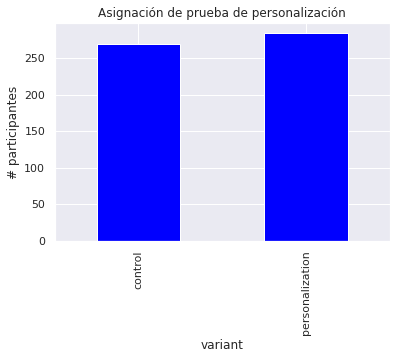

In [74]:
# Subconjunto del Df
email = marketing[marketing['marketing_channel'] == 'Email']

# Agrupar el DataFrame de correo electrónico por variante
alloc = email.groupby(['variant'])['user_id'].nunique()

# Trazar un gráfico de barras de la asignación de la prueba
alloc.plot(kind='bar',color= 'blue')
plt.title('Asignación de prueba de personalización')
plt.ylabel('# participantes')
plt.show()

En este caso , podemos proceder con el suspuesto de que no hubo problemas en el proceso de seleccion aleatoria.

Primero nos aseguraremos de que cada usuario y variante tenga un solo resultado de suscripcion .

In [75]:
suscribers = email.groupby(['user_id',
                           'variant'])['converted'].max()

suscribers = pd.DataFrame(suscribers.unstack(level=1))

Creamos una serie de resultados tanto para el contro como para las variantes de personalización. Podemos usar `dropna()` en cada Serie para incluir solo resultados de conversión para todos los usuarios en cada variante.

In [76]:
# Eliminamos los valores faltantes de la columna control
control = suscribers['control'].dropna()

# Eliminamos los valores nulos de la columna pesronalization

personalization = suscribers['personalization'].dropna()


Luego podemos calcular la tasa de conversión tomando la media de cada serie.

In [77]:
print("Tasa de conversion de los correos con productos extra:",np.mean(control))
print("Tasa de conversión de los correos personalizados:",np.mean(personalization))

Tasa de conversion de los correos con productos extra: 0.2814814814814815
Tasa de conversión de los correos personalizados: 0.3908450704225352


### Cálculo de pruebas de elevación y significación.


En esta sección , hablaremos sobre el cálculo de la elevación y la significación estadística.
La primera pregunta que querras responder cuando realicemos una prueba es :¿Cuál es el impulso?.

En este caso, lo que esto significa es : ¿Fue la tasa de conversión más alta para el tratamiento y por cuánto fue mas alta?


La elevación se calcula tomando la diferencia entre el tratamiento de la tasa de conversión menos la trasa de conversión de control , entre la tasa de conversion de control.

Para calcular la elevación , calculamos las tasas de conversio1n del control y los grupos de personalización, luego calculamos la elevación utilizando la ecuacion y asi tenemos nuestro resultado.

In [78]:
a_mean = np.mean(control)
b_mean = np.mean(personalization)

lift = (b_mean-a_mean)/a_mean

print("Lift/Elevación: ", str(round(lift*100,2)) + '%')

Lift/Elevación:  38.85%


Como podemos ver , la variante de personalizacio1n , es decir los correos personalizados mejoraron la tasa de conversión de control en un 38%.Esta es una muy buena señal , que deberiamos de conciderar ejecutar correos electronicos personalizados en el futuro.

Antes de profundizar más hablemos de la distribución t de Student.

La distribución t es una distribución de probabilidad que estima el valor de la media de una muestra pequeña extraída de una población que sigue una distribución normal y de la cual no conocemos su desviación típica.


Esta utiliza la media y la varianza muestral para determinar la probailidad de que la variación entre las dos muestrar ocurriera por casualidad.

La prueba t nos da una estadística t y un valor p que nos permite estimar , la probabilidad de encontrar un resultado al menos tan extremos como el tratamiento de nuestra prueba.

Si bien depende del tamaño de la muestra y de la prueba , generalmente una estadistica $t=1.96$ se evalua a un valor de $p=0.05$ que se traduce en un significado del 95% , un umbral comunmente utilizado para las pruenbas de significación.

Para ejecutar una prueba t en Pyton, podemos usar la función `ttest_ind()` del módulo de estadísticas del paquete `scipy`.
En este caso el argumento que pasaremos a nuyestra funcio1n , son los resultados son si cada usuario se convirtio o no .


In [79]:
from scipy.stats import ttest_ind

t = ttest_ind(control,personalization)

print(t)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)


Dado que el valor es menor que 0.05 podemos estar seguros de que la diferencia en las tasas de conversio1n es estadisticamente significativa.


Crearás una función para automatizar el proceso de cálculo de la elevación. Muchos equipos de marketing realizan pruebas constantemente. Cuanto más pueda automatizar las partes del proceso que ocurren dentro de cada prueba, más tiempo tendrá para hacer análisis más interesantes.

In [80]:
def lift(a,b):
    # Calcula la media de a y de b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calcula la elevación usando a_mean y b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift () con control y personalización como entradas
print(lift(control, personalization))

38.85%


Una de las trampas más comunes en las pruebas A/B es asumir que un tratamiento afecta igualmente a todos en una población.

Al igual que con cualquier otro tipo de marketing, algunos de  los tratamientos son particularmente efectivos en usuarios de un nivel especifico de compromiso, edad, razo o cualquier otro factor.

Es importante desglosar los resultados por diversos datos demográficos para obtener una comprensión holistica del impacto de la prueba.

Recordemos que uno de los desafios principales de la segmentacio1n es encontrar la mejor manera de evitar el trabajo repetitivo.Aqui usaremos bucles para calcular la elevación y la signiicación estadistica en multiples segmentos de usuarios.

En la lección anterior, observamos que tu experimento de personalización es muy significativo estadísticamente. Sin embargo, al realizar experimentos, es importante comprobar cómo las nuevas funciones están afectando a datos demográficos específicos. A veces, las características que son muy atractivas para un grupo son menos atractivas para otros.

Dado que desea segmentar nuestros datos varias veces, creará una función ab_segmentation () que analiza el impacto de sus pruebas A / B en segmentos de datos que puede reutilizar cada vez que desee realizar este tipo de análisis.

Su función tomará un nombre de columna y se ejecutará a través de cada valor único en esa columna calculando la elevación y la significación estadística.

In [83]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization))
      print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

Ahora que ha generado una función ab_segmentation (), es hora de probarla.

A menudo, un tratamiento no afectará a todas las personas de manera uniforme. A algunas personas les encantará una campaña de marketing en particular, mientras que otras la odian. Como científico de datos de marketing, es su responsabilidad permitir que las partes interesadas del marketing se dirijan a los usuarios según sus preferencias.

Analizaremos dos segmentos en nuestros datos que pueden ser relevantes para evaluar el impacto de nuestra prueba.

In [ ]:
ab_segmentation('language_displayed')

In [ ]:
ab_segmentation('age_group')

Descubrió que la personalización era extremadamente efectiva para los grupos más jóvenes, pero menos efectiva que el control para los grupos mayores. Una explicación podría ser que los usuarios más jóvenes entienden cómo se pueden usar sus datos en línea y piensan que la personalización es genial porque les brinda más información sobre sí mismos, mientras que las personas mayores pueden sentir que esto es una violación de su privacidad.